In [84]:
import numpy as np
import pandas as pd
import matplotlib as plot
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
#EDA

def clear_genres(df, genre_counts):
    genres_to_delete = []
    for genre in genre_counts.items():
        if(genre[1] < 200):
            genres_to_delete.append(genre[0])
            
    for genre in genres_to_delete:
        df = df[df['genre_1'] != genre]
        df = df[df['genre_2'] != genre]
        df = df[df['genre_3'] != genre]
    df = df.drop(df.columns[0], axis=1)
    df = df.reset_index(drop=True)
    return df 


    


In [86]:
def change_to_numeric(df, col_to_change):  ##[genre_1, genre_2,genre_3]
    values_dict = dict()
    values_dict[np.nan] = 0
    value = 1
    number_of_col = len(col_to_change)
    for i in range(number_of_col):
        genres = df[col_to_change[i]]
        for genre in genres:
            if genre not in values_dict:
                values_dict[genre] = value
                value += 1
                
    for i in range(number_of_col):
        df = df.replace({col_to_change[i]:values_dict})

    return df
        
            
    

In [87]:

df = pd.read_csv('movie_table_finish.csv')
df.head()
df['rating'] = df['rating'].apply(np.floor)
df




,Unnamed: 0,name,Length Of Movie (minute),year,idbm_year,gender_director,director_1,writer_1,writer_2,writer_3,star_1,star_2,star_3,genre_1,genre_2,genre_3,rating
0,0,Adam at Six A.M.,100.0,1970,1970,1,Robert Scheerer,Stephen Karpf,Elinor Karpf,NaN,Michael Douglas,Lee Purcell,Joe Don Baker,Drama,NaN,NaN,5.0
1,1,Adam's Woman,116.0,1970,1970,1,Philip Leacock,Richard Fielder,Lowell Barrington,NaN,Beau Bridges,John Mills,Jane Merrow,Drama,NaN,NaN,6.0
2,2,The Adventurers,171.0,1970,1970,1,Lewis Gilbert,Michael Hastings,Lewis Gilbert,Harold Robbins,Charles Aznavour,Alan Badel,Candice Bergen,Action,Adventure,Drama,5.0
3,3,Airport,137.0,1970,1970,1,George Seaton,Arthur Hailey,George Seaton,NaN,Burt Lancaster,Dean Martin,George Kennedy,Action,Drama,Thriller,6.0
4,4,Alex in Wonderland,110.0,1970,1970,1,Paul Mazursky,Paul Mazursky,Larry Tucker,NaN,Donald Sutherland,Ellen Burstyn,Meg Mazursky,Comedy,Drama,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,7984,We Can Be Heroes,100.0,2020,2020,1,Robert Rodriguez,Robert Rodriguez,Sara Endsley,Dan Foos,YaYa Gosselin,Pedro Pascal,Priyanka Chopra Jonas,Action,Comedy,Drama,4.0
7985,7985,News of the World,118.0,2020,2020,1,Paul Greengrass,Paul Greengrass,Luke Davies,Paulette Jiles,Tom Hanks,Helena Zengel,Tom Astor,Action,Adventure,Drama,6.0
7986,7986,One Night in Miami...,114.0,2020,2020,0,Regina King,Kemp Powers,NaN,NaN,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,NaN,NaN,7.0
7987,7987,Promising Young Woman,113.0,2020,2020,0,Emerald Fennell,Emerald Fennell,NaN,NaN,Carey Mulligan,Bo Burnham,Alison Brie,Crime,Drama,Mystery,7.0


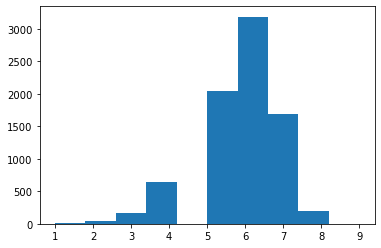

In [97]:
plt.hist(df['rating']);

Text(0, 0.5, 'Count')

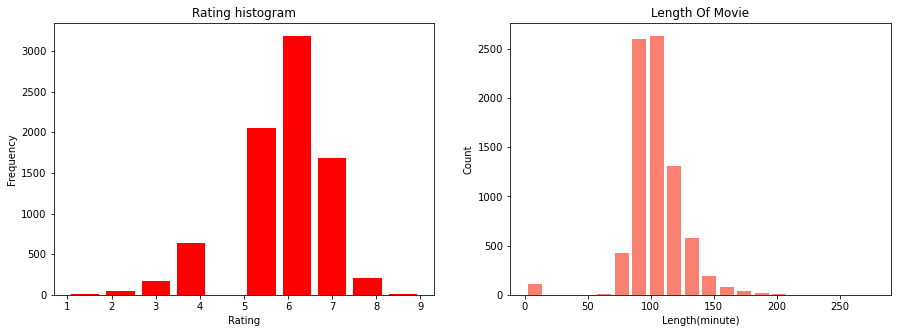

In [88]:
##showing Frequency of every Rating
fig = plt.figure(figsize=(15, 5))
fig1 =fig.add_subplot(1,2,1)
fig2 =fig.add_subplot(1,2,2)

fig1.hist(df.rating, bins=10,rwidth=0.8, color='red')
fig1.set_title('Rating histogram')
fig1.set_xlabel('Rating')
fig1.set_ylabel('Frequency')
fig2.hist(df['Length Of Movie (minute)'], bins=20,rwidth=0.8, color='salmon')
fig2.set_title('Length Of Movie')
fig2.set_xlabel('Length(minute)')
fig2.set_ylabel('Count')



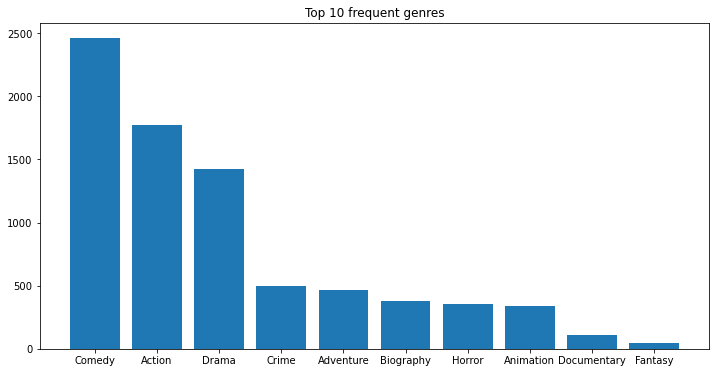

In [89]:
counts = df['genre_1'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
top_10 = counts[:10] # here we get the most frequent genres in the data set
plt.bar(range(10), top_10.values, align='center', tick_label=top_10.keys());
plt.title("Top 10 frequent genres");

In [92]:
values = ['Music','Musical','Family','Romance','Fantasy','Mystery','War','Short','Sci-Fi','Western','Thriller']

#drop rows that contain any value in the list
newdf = df[df.genre_1.isin(values) == False]

counts = newdf['genre_1'].value_counts()
counts

Comedy         2460
Action         1772
Drama          1426
Crime           495
Adventure       464
Biography       381
Horror          354
Animation       341
Documentary     107
Name: genre_1, dtype: int64

Text(0, 0.5, 'Rating')

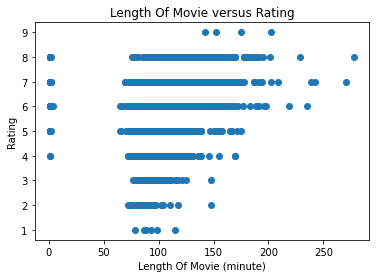

In [100]:
plt.scatter(df['Length Of Movie (minute)'], df['rating'])
plt.title('Length Of Movie versus Rating')
plt.xlabel('Length Of Movie (minute)')
plt.ylabel('Rating')

Text(0, 0.5, 'Genres')

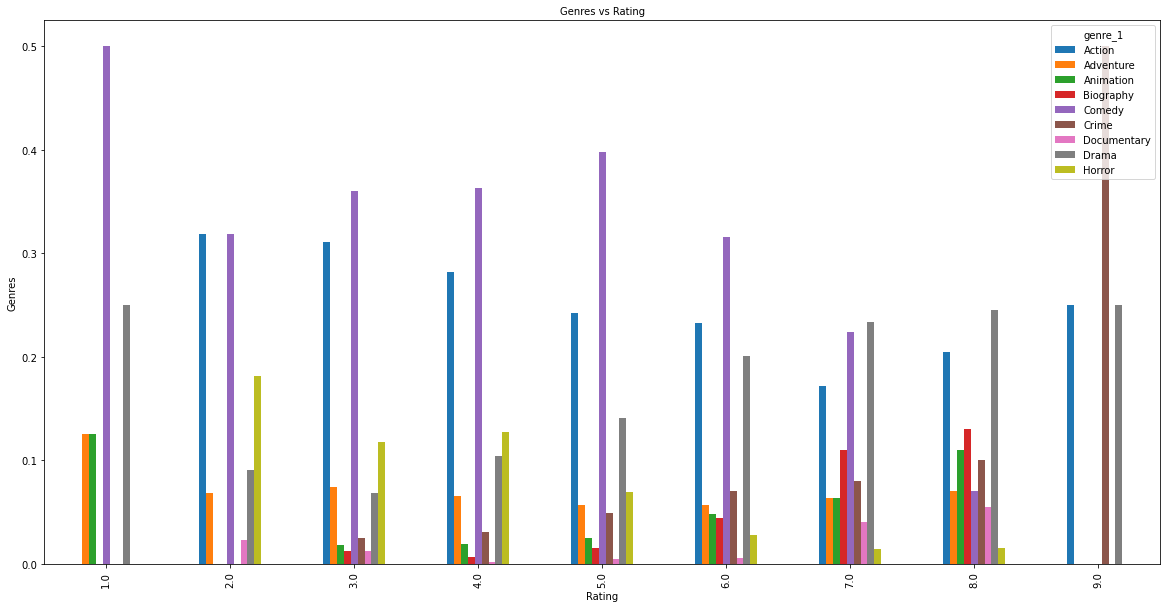

In [94]:

ct2 = pd.crosstab(newdf['rating'],newdf['genre_1'],normalize='index')
ct2.plot(kind='bar', figsize=(20,10))
plt.title('Genres vs Rating', fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Genres')

Text(0, 0.5, 'Count')

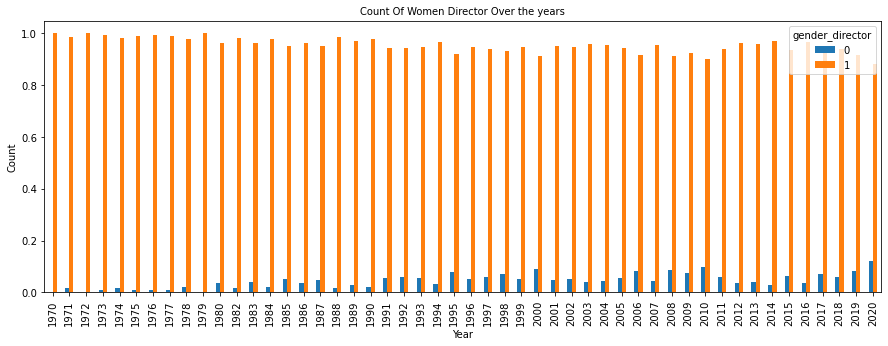

In [95]:
ct2 = pd.crosstab(df['year'],df['gender_director'],normalize='index')
ct2.plot(kind='bar', figsize=(15,5))
plt.title('Count Of Women Director Over the years', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Count')

Text(0, 0.5, 'Gender')

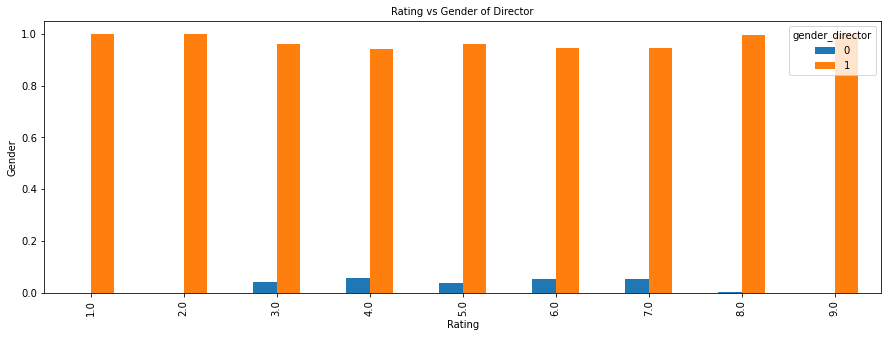

In [96]:
ct2 = pd.crosstab(df['rating'],df['gender_director'],normalize='index')
ct2.plot(kind='bar', figsize=(15,5))
plt.title('Rating vs Gender of Director', fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Gender')



In [ ]:
plt.scatter(x=df['genre_1'],y=df['rating'],c='r',marker='s',label='genre_1')
# plt.scatter(x=df['star_1'],y=df['rating'],c='b',marker='o',label='star_1')
plt.scatter(x=df['director_1'],y=df['rating'],c='k',marker='*',label='director_1')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()